In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

['site AtomicWeight_atom1', 'site Row_atom1', 'site Electronegativity_atom1', 'site CovalentRadius_atom1', 'AGNI eta=8.00e-01_atom1', 'AGNI eta=6.80e+00_atom2', 'G2_0.05_atom1', 'G4_0.005_4.0_1.0_atom1']


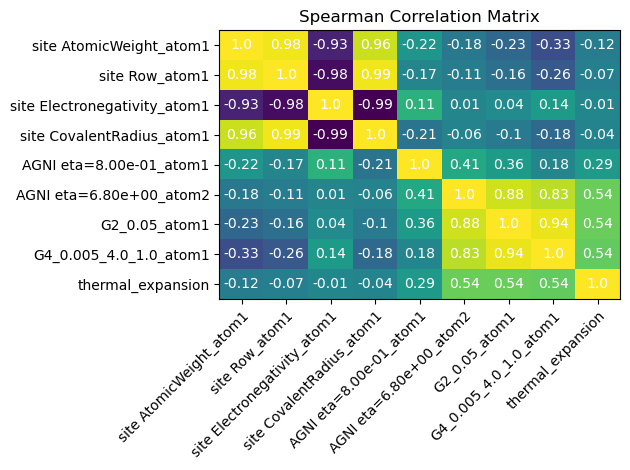

In [15]:
labels_df = pd.read_csv("labels/labels.csv")
labels_df = labels_df.set_index("structure_name")
features_df = pd.read_csv("features/features_full.csv")

# Choose Features
feature_labels = ["site AtomicWeight_atom1", "site Row_atom1",  "site Electronegativity_atom1", "site CovalentRadius_atom1", "AGNI eta=8.00e-01_atom1", "AGNI eta=6.80e+00_atom2", "G2_0.05_atom1", "G4_0.005_4.0_1.0_atom1"]  # Select Features
#feature_labels = features_df.columns[7:].to_list()  # ALL FEATURES

# Retrieve chosen features
X = features_df[feature_labels].to_numpy()
X_structures = features_df["structure_name_atom1"].to_list()
print(feature_labels)

# Copy over labels to each bond (just for correlation)
y = np.zeros((len(X), 1))
for i in range(len(X)):
    structure = features_df.iloc[i,0].split("_super")[0]
    y[i] = labels_df.loc[structure, "thermal_expansion"]

## Generate Heat Map for Correlation Matrix
"""
# Just to check its all working
for i in range(len(feature_labels)):
    print(feature_labels[i])
    print(np.corrcoef(np.transpose(np.append(X[:,i:i+1], y, 1)))[0][1])
"""

pearson = np.corrcoef(np.transpose(np.append(X, y, 1)))

fig, ax = plt.subplots()
im = ax.imshow(pearson, aspect='auto')
feature_labels.append("thermal_expansion")
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(feature_labels)), labels=feature_labels)
ax.set_yticks(np.arange(len(feature_labels)), labels=feature_labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(feature_labels)):
    for j in range(len(feature_labels)):
        text = ax.text(j, i, np.round(100*pearson[i, j])/100,
                       ha="center", va="center", color="w")

ax.set_title("Pearson Correlation Matrix")
fig.tight_layout()
plt.savefig("figs/"+"pearson.png")
plt.show()



spearman = scipy.stats.spearmanr(np.append(X, y, 1)).statistic
fig, ax = plt.subplots()
im = ax.imshow(spearman, aspect='auto')
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(feature_labels)), labels=feature_labels)
ax.set_yticks(np.arange(len(feature_labels)), labels=feature_labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(feature_labels)):
    for j in range(len(feature_labels)):
        text = ax.text(j, i, np.round(100*pearson[i, j])/100,
                       ha="center", va="center", color="w")

ax.set_title("Spearman Correlation Matrix")
fig.tight_layout()
plt.savefig("figs/"+"spearman.png")
plt.show()
